In [1]:
# Importing necessary libraries
library("tidyverse")
library("ggplot2")
library("ggrepel")
library("ggcorrplot")
library("DT")
library(dplyr)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Data Preparation

## Global Mobility Dataset

In [104]:
# Retrieve "COVID-19_global_mobility.csv" file
dataset_global_mobility <- read.csv("https://www.dropbox.com/scl/fi/x4i3ah1gmt4kryrrq0c8m/Global_Mobility_Report.csv?rlkey=tt4i5q1zss7e8ly2zmn8xvhc2&st=xnxrxz2d&dl=1")

In [106]:
# Convert the date column from character to Date format
dataset_global_mobility <- dataset_global_mobility %>%
  mutate(date = as.Date(date, format = "%Y-%m-%d"))

# Filter the dataset to include only rows with the date "2021-01-19"
dataset_global_mobility_updated <- dataset_global_mobility %>%
  filter(date == as.Date("2021-01-19"))

In [107]:
summary(dataset_global_mobility_updated$date)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2021-01-19" "2021-01-19" "2021-01-19" "2021-01-19" "2021-01-19" "2021-01-19"

Only the observations from 1/19/2021 are in the global datset now.

In [109]:
# count of observations in the updated global mobility dataset
nrow(dataset_global_mobility_updated)

[1] 13122

In [110]:
# Filter the dataset to include only rows where sub_region_2 is "Texas"
dataset_global_mobility_updated <- dataset_global_mobility_updated %>%
  filter(sub_region_1 == "Texas")

In [113]:
length(unique(dataset_global_mobility_updated$sub_region_2))

[1] 205

In [114]:
# remove the rows with missing value in the county_name column
dataset_global_mobility_updated <- dataset_global_mobility_updated %>%
  filter(!is.na(sub_region_2))

In [115]:
# Remove the first row using slice
dataset_global_mobility_updated <- dataset_global_mobility_updated %>%
  slice(-1)

In [116]:
length(unique(dataset_global_mobility_updated$sub_region_2))

[1] 204

In [117]:
write.csv(dataset_global_mobility_updated, "dataset_global_mobility_updated.csv", row.names = FALSE )

## COVID-19 Plus Census Dataset

In [119]:
# Retrieve "COVID-19_cases_plus_census.csv" file
dataset_plus_census <- read.csv("https://raw.githubusercontent.com/yamphurai/Project2_ClusterAnalysis/refs/heads/main/updated_COVID-19_cases_plus_census.csv")

In [120]:
#filter the dataset by Texas
dataset_plus_census <- dataset_plus_census %>% filter(state == "TX")

In [121]:
length(unique(dataset_plus_census$county_name))

[1] 254

In [122]:
head(dataset_plus_census$county_name)

[1] "Hansford County"  "Stonewall County" "Cochran County"   "Crockett County" 
[5] "McCulloch County" "Sherman County"

In [123]:
# Extract unique names from both columns
sub_region_2_names <- unique(dataset_global_mobility_updated$sub_region_2)
county_names <- unique(dataset_plus_census$county_name)

# Find names that are in county_names but not in sub_region_2_names
missing_in_sub_region_2 <- setdiff(county_names, sub_region_2_names)

# Display the missing names
print(missing_in_sub_region_2)
length(unique(missing_in_sub_region_2))

 [1] "Hansford County"      "Stonewall County"     "Cochran County"      
 [4] "Crockett County"      "King County"          "Briscoe County"      
 [7] "Cottle County"        "Sutton County"        "Menard County"       
[10] "Jim Hogg County"      "Loving County"        "Edwards County"      
[13] "Kinney County"        "Armstrong County"     "Foard County"        
[16] "Irion County"         "Glasscock County"     "Baylor County"       
[19] "Sterling County"      "Dickens County"       "Mills County"        
[22] "Collingsworth County" "Schleicher County"    "Throckmorton County" 
[25] "Shackelford County"   "Knox County"          "Wheeler County"      
[28] "Upton County"         "Hemphill County"      "Floyd County"        
[31] "Donley County"        "Fisher County"        "Lipscomb County"     
[34] "Delta County"         "Concho County"        "Garza County"        
[37] "Hudspeth County"      "Real County"          "San Saba County"     
[40] "Kenedy County"        "Hartley C

[1] 50

In [124]:
# Remove the rows from dataset_plus_census where county_name is in names_to_remove
dataset_plus_census <- dataset_plus_census %>%
  filter(!county_name %in% missing_in_sub_region_2)

In [125]:
# remove the rows with missing value in the county_name column
dataset_plus_census <- dataset_plus_census %>%
  filter(!is.na(county_name))

In [126]:
length(unique(dataset_plus_census$county_name))

[1] 204

In [127]:
write.csv(dataset_plus_census, "dataset_plus_census.csv", row.names = FALSE )

Finally the two datasets are ready to be merged.

## Final Dataset

In [129]:
# Sort dataset_plus_census by county_name in ascending order
dataset_plus_census_sorted <- dataset_plus_census %>%
  arrange(county_name)

# Sort dataset_global_mobility_updated by sub_region_2 in ascending order
dataset_global_mobility_updated_sorted <- dataset_global_mobility_updated %>%
  arrange(sub_region_2)

# Merge the datasets column-wise
dataset <- cbind(dataset_plus_census_sorted, dataset_global_mobility_updated_sorted)


In [131]:
head(dataset, 10)

,state,state_fips_code,county_name,confirmed_cases,deaths,total_pop,male_pop,female_pop,white_pop,black_pop,⋯,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>
1,TX,48,Anderson County,5575,75,57747,35292,22455,34468,12075,⋯,,,48001,2021-01-19,-15,-17,NA,NA,-18,6
2,TX,48,Andrews County,1606,37,17577,8980,8597,7229,265,⋯,,,48003,2021-01-19,-28,NA,NA,14,-25,NA
3,TX,48,Angelina County,6765,193,87700,42707,44993,53704,12878,⋯,,,48005,2021-01-19,-13,-9,NA,-6,-20,8
4,TX,48,Aransas County,895,26,24832,12448,12384,16803,390,⋯,,,48007,2021-01-19,-16,1,-23,NA,-21,6
5,TX,48,Archer County,694,10,8793,4335,4458,7787,74,⋯,,,48009,2021-01-19,NA,NA,NA,NA,-17,NA
6,TX,48,Atascosa County,3781,90,48139,24051,24088,16480,353,⋯,,,48013,2021-01-19,-13,-13,NA,NA,-26,11
7,TX,48,Austin County,1404,18,29292,14474,14818,18533,2601,⋯,,,48015,2021-01-19,-10,-1,NA,NA,-18,7
8,TX,48,Bailey County,742,15,7098,3678,3420,2459,108,⋯,,,48017,2021-01-19,NA,NA,NA,NA,-22,NA
9,TX,48,Bandera County,820,20,21316,10570,10746,16788,213,⋯,,,48019,2021-01-19,NA,NA,NA,NA,-24,11


In [136]:
# Check for missing values in each column
missing_values <- colSums(is.na(dataset))

# Print the names of columns that have missing values
columns_with_missing_values <- names(missing_values[missing_values > 0])

# Print the names of columns with missing values
print("Columns with missing values:")
print(columns_with_missing_values)

[1] "Columns with missing values:"
[1] "retail_and_recreation_percent_change_from_baseline"
[2] "grocery_and_pharmacy_percent_change_from_baseline" 
[3] "parks_percent_change_from_baseline"                
[4] "transit_stations_percent_change_from_baseline"     
[5] "workplaces_percent_change_from_baseline"           
[6] "residential_percent_change_from_baseline"          


In [143]:
print("Total number of observations: ")
print(nrow(dataset))

#Count of missing values in these columns
sum(is.na(dataset["retail_and_recreation_percent_change_from_baseline"]))
sum(is.na(dataset["grocery_and_pharmacy_percent_change_from_baseline"]))
sum(is.na(dataset["parks_percent_change_from_baseline"]))
sum(is.na(dataset["transit_stations_percent_change_from_baseline"]))
sum(is.na(dataset["workplaces_percent_change_from_baseline"]))
sum(is.na(dataset["residential_percent_change_from_baseline"]))

[1] "Total number of observations: "
[1] 204


[1] 91

[1] 104

[1] 155

[1] 114

[1] 9

[1] 93

Since most of these feature columns have too many missing values, we will be replacing them with the average value from their corresponding column.

In [145]:
# Replace the missing values with mean values
mean_value_retail <- mean(dataset$retail_and_recreation_percent_change_from_baseline, na.rm = TRUE)
dataset$retail_and_recreation_percent_change_from_baseline[is.na(dataset$retail_and_recreation_percent_change_from_baseline)] <- mean_value_retail

mean_value_grocery_pharmacy <- mean(dataset$grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE)
dataset$grocery_and_pharmacy_percent_change_from_baseline[is.na(dataset$grocery_and_pharmacy_percent_change_from_baseline)] <- mean_value_grocery_pharmacy

mean_value_parks <- mean(dataset$parks_percent_change_from_baseline, na.rm = TRUE)
dataset$parks_percent_change_from_baseline[is.na(dataset$parks_percent_change_from_baseline)] <- mean_value_parks

mean_value_transit_stations <- mean(dataset$transit_stations_percent_change_from_baseline, na.rm = TRUE)
dataset$transit_stations_percent_change_from_baseline[is.na(dataset$transit_stations_percent_change_from_baseline)] <- mean_value_transit_stations

mean_value_workplaces <- mean(dataset$workplaces_percent_change_from_baseline, na.rm = TRUE)
dataset$workplaces_percent_change_from_baseline[is.na(dataset$workplaces_percent_change_from_baseline)] <- mean_value_workplaces

mean_value_residential <- mean(dataset$residential_percent_change_from_baseline, na.rm = TRUE)
dataset$residential_percent_change_from_baseline[is.na(dataset$residential_percent_change_from_baseline)] <- mean_value_residential

In [146]:
#Check for the missing values in the updated coloumns
sum(is.na(dataset["retail_and_recreation_percent_change_from_baseline"]))
sum(is.na(dataset["grocery_and_pharmacy_percent_change_from_baseline"]))
sum(is.na(dataset["parks_percent_change_from_baseline"]))
sum(is.na(dataset["transit_stations_percent_change_from_baseline"]))
sum(is.na(dataset["workplaces_percent_change_from_baseline"]))
sum(is.na(dataset["residential_percent_change_from_baseline"]))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [148]:
names(dataset)

[1] "state"                                             
 [2] "state_fips_code"                                   
 [3] "county_name"                                       
 [4] "confirmed_cases"                                   
 [5] "deaths"                                            
 [6] "total_pop"                                         
 [7] "male_pop"                                          
 [8] "female_pop"                                        
 [9] "white_pop"                                         
[10] "black_pop"                                         
[11] "asian_pop"                                         
[12] "hispanic_pop"                                      
[13] "amerindian_pop"                                    
[14] "other_race_pop"                                    
[15] "median_income"                                     
[16] "income_less_50K"                                   
[17] "income_50K_100K"                                   
[18] "income_100K_150K"                                  
[19] "income_150K_more"                                  
[20] "rent_under_50_percent"                             
[21] "rent_over_50_percent"                              
[22] "median_age"                                        
[23] "male_0_20"                                         
[24] "male_21_49"                                        
[25] "male_50_above"                                     
[26] "female_0_20"                                       
[27] "female_21_49"                                      
[28] "female_50_above"                                   
[29] "unemployed_pop"                                    
[30] "employed_pop"                                      
[31] "commute"                                           
[32] "worked_at_home"                                    
[33] "walked_to_work"                                    
[34] "country_region_code"                               
[35] "country_region"                                    
[36] "sub_region_1"                                      
[37] "sub_region_2"                                      
[38] "metro_area"                                        
[39] "iso_3166_2_code"                                   
[40] "census_fips_code"                                  
[41] "date"                                              
[42] "retail_and_recreation_percent_change_from_baseline"
[43] "grocery_and_pharmacy_percent_change_from_baseline" 
[44] "parks_percent_change_from_baseline"                
[45] "transit_stations_percent_change_from_baseline"     
[46] "workplaces_percent_change_from_baseline"           
[47] "residential_percent_change_from_baseline"

In [150]:
# Drop the specified columns
dataset <- dataset %>% select(-state, -state_fips_code, -country_region_code, -country_region, -sub_region_1, -sub_region_2, -metro_area, 
                              -iso_3166_2_code, -census_fips_code, -date)

In [170]:
summary(dataset)

          county_name  confirmed_cases        deaths         total_pop      
 Anderson County:  1   Min.   :    70.0   Min.   :   2.0   Min.   :    600  
 Andrews County :  1   1st Qu.:   941.5   1st Qu.:  21.0   1st Qu.:  12635  
 Angelina County:  1   Median :  1889.5   Median :  45.5   Median :  24898  
 Aransas County :  1   Mean   : 10424.4   Mean   : 157.0   Mean   : 133668  
 Archer County  :  1   3rd Qu.:  5066.5   3rd Qu.: 103.8   3rd Qu.:  66671  
 Atascosa County:  1   Max.   :286356.0   Max.   :3825.0   Max.   :4525519  
 (Other)        :198                                                        
    male_pop         female_pop        white_pop         black_pop       
 Min.   :    321   Min.   :    279   Min.   :    292   Min.   :     0.0  
 1st Qu.:   6365   1st Qu.:   5955   1st Qu.:   6792   1st Qu.:   269.5  
 Median :  12552   Median :  12336   Median :  14862   Median :  1375.5  
 Mean   :  66364   Mean   :  67304   Mean   :  57194   Mean   : 15664.0  
 3rd Qu.:  340

In [171]:
# Save the dataset
write.csv(dataset, "dataset.csv", row.names = FALSE )

## Pick features & evaluate correlations

In [172]:
# Make character factors for analysis
dataset <- dataset %>% mutate_if(is.character, factor)

In [173]:
# Calculate rates (per 10,000 people)

dataset <- dataset %>% filter(confirmed_cases > 0) 
  
dataset <- dataset %>% mutate(
  cases_per_10000 = confirmed_cases/total_pop*10000, 
  deaths_per_10000 = deaths/total_pop*10000, 
  death_per_case = deaths/confirmed_cases)

In [174]:
# Check for the added columns
names(dataset)

[1] "county_name"                                       
 [2] "confirmed_cases"                                   
 [3] "deaths"                                            
 [4] "total_pop"                                         
 [5] "male_pop"                                          
 [6] "female_pop"                                        
 [7] "white_pop"                                         
 [8] "black_pop"                                         
 [9] "asian_pop"                                         
[10] "hispanic_pop"                                      
[11] "amerindian_pop"                                    
[12] "other_race_pop"                                    
[13] "median_income"                                     
[14] "income_less_50K"                                   
[15] "income_50K_100K"                                   
[16] "income_100K_150K"                                  
[17] "income_150K_more"                                  
[18] "rent_under_50_percent"                             
[19] "rent_over_50_percent"                              
[20] "median_age"                                        
[21] "male_0_20"                                         
[22] "male_21_49"                                        
[23] "male_50_above"                                     
[24] "female_0_20"                                       
[25] "female_21_49"                                      
[26] "female_50_above"                                   
[27] "unemployed_pop"                                    
[28] "employed_pop"                                      
[29] "commute"                                           
[30] "worked_at_home"                                    
[31] "walked_to_work"                                    
[32] "retail_and_recreation_percent_change_from_baseline"
[33] "grocery_and_pharmacy_percent_change_from_baseline" 
[34] "parks_percent_change_from_baseline"                
[35] "transit_stations_percent_change_from_baseline"     
[36] "workplaces_percent_change_from_baseline"           
[37] "residential_percent_change_from_baseline"          
[38] "cases_per_10000"                                   
[39] "deaths_per_10000"                                  
[40] "death_per_case"

In [175]:
# Select the features for the dataset
dataset_select <-  dataset %>% select(county_name, total_pop, hispanic_pop, black_pop, male_50_above, female_50_above,
                                      income_50K_100K, rent_over_50_percent, commute, worked_at_home, transit_stations_percent_change_from_baseline, 
                                      workplaces_percent_change_from_baseline, 
                                      cases_per_10000, deaths_per_10000, death_per_case)

In [176]:
# Normalize by population
dataset_select <- dataset_select %>% mutate(
  hispanic_pop = hispanic_pop / total_pop, 
  black_pop = black_pop / total_pop,
  male_50_above = male_50_above / total_pop, 
  female_50_above = female_50_above / total_pop, 
  income_50K_100K = income_50K_100K / total_pop, 
  rent_over_50_percent = rent_over_50_percent / total_pop, 
  commute = commute / total_pop,
  worked_at_home = worked_at_home/ total_pop, 
  )

In [177]:
summary(dataset_select)

          county_name    total_pop        hispanic_pop       black_pop      
 Anderson County:  1   Min.   :    600   Min.   :0.03454   Min.   :0.00000  
 Andrews County :  1   1st Qu.:  12635   1st Qu.:0.17705   1st Qu.:0.01504  
 Angelina County:  1   Median :  24898   Median :0.25266   Median :0.05254  
 Aransas County :  1   Mean   : 133668   Mean   :0.34352   Mean   :0.07161  
 Archer County  :  1   3rd Qu.:  66671   3rd Qu.:0.48529   3rd Qu.:0.10209  
 Atascosa County:  1   Max.   :4525519   Max.   :0.99185   Max.   :0.33743  
 (Other)        :198                                                        
 male_50_above    female_50_above  income_50K_100K   rent_over_50_percent
 Min.   :0.1067   Min.   :0.1192   Min.   :0.04964   Min.   :0.00000     
 1st Qu.:0.1564   1st Qu.:0.1698   1st Qu.:0.09331   1st Qu.:0.01207     
 Median :0.1857   Median :0.1949   Median :0.10466   Median :0.01587     
 Mean   :0.1854   Mean   :0.2004   Mean   :0.10275   Mean   :0.01745     
 3rd Qu.:0.211

In [179]:
# Check for correlation
library(seriation)

cm <- cor(dataset_select %>% select_if(is.numeric) %>% na.omit)

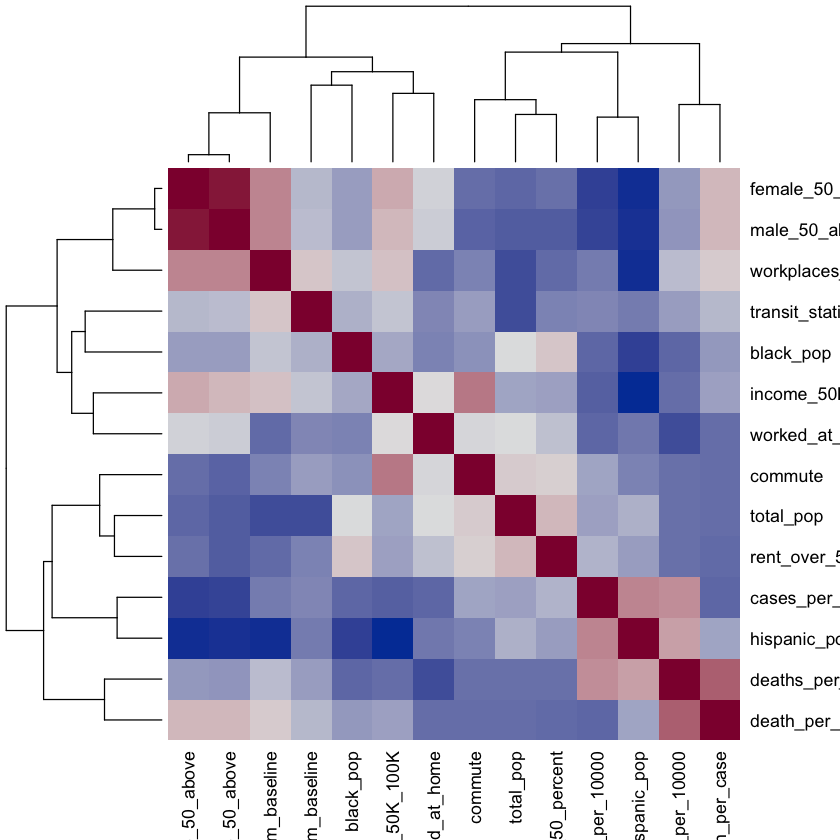

In [184]:
hmap(cm, margins = c(5,5))

## Create Class Variable

In [202]:
# Label "high" for the counties with deaths per 10000 that is greater than 10
dataset_select <- dataset_select %>% mutate(high = as.factor(deaths_per_10000 > 16))

In [203]:
# Check for class imbalance
dataset_select %>% pull(bad) %>% table()

.
FALSE  TRUE 
  100   104 

With threshold of 16, the dataset is close to perfectly balanced.

In [205]:
# Group the counties by category in descending order
dataset_select %>% group_by(county_name) %>% 
  summarize(high_pct = sum(high == TRUE)/n()) %>%
  arrange(desc(high_pct))

county_name,high_pct
<fct>,<dbl>
Andrews County,1
Angelina County,1
Atascosa County,1
Bailey County,1
Bee County,1
Brooks County,1
Brown County,1
Callahan County,1
Cameron County,1


## Test & Train split

## Build Model 1

## Accuracy & Evaluation